# Baseball data analysis

The data was approached by the author, who is completely ignorant in the subject of baseball, even more so in the american baseball league. Please, keep this in mind while reading through the notebook.

## Getting to know the data

In this section we start by trying to understand which data we are dealing with. We will think about how to approach the data and which conclusions we want to extract from it.

In [1]:
# We start by showing which files are at our disposal.

import os

os.listdir("baseballdatabank/")

['CollegePlaying.csv',
 'HomeGames.csv',
 'FieldingOF.csv',
 'AwardsSharePlayers.csv',
 'AllstarFull.csv',
 'readme2014.txt',
 'Parks.csv',
 'Master.csv',
 'Teams.csv',
 'Fielding.csv',
 'HallOfFame.csv',
 'Managers.csv',
 'PitchingPost.csv',
 'FieldingPost.csv',
 'AwardsShareManagers.csv',
 'AwardsManagers.csv',
 'BattingPost.csv',
 'AwardsPlayers.csv',
 'Appearances.csv',
 'Pitching.csv',
 'TeamsFranchises.csv',
 'Schools.csv',
 'ManagersHalf.csv',
 'Salaries.csv',
 'SeriesPost.csv',
 'Batting.csv',
 'TeamsHalf.csv']

## Salaries

In [2]:
# We first open the 'Salaries.csv' file and have a look what it looks like

import pandas as pd

salaries = pd.read_csv("baseballdatabank/Salaries.csv")

print len(salaries)

salaries.head()

25575


,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


To understand the headers we look up what is saved in the "Salaries.csv" file in the "readme2014.txt" file, which 
explains all the other documents. Regarding our csv file, we find the following:

In [3]:
# 2.15 Salaries table
# 
# yearID         Year
# teamID         Team
# lgID           League
# playerID       Player ID code
# salary         Salary

A first question would be if the different leagues had a different evolution of the average salary over the years. Let us first see how many different leagues are saved here:

In [4]:
salaries['lgID'].unique()

array(['NL', 'AL'], dtype=object)

There are two kind of leagues, 'NL' and 'AL'. Let us group the data by year and league, and compute the mean of both leagues over the years.

In [5]:
salaries_by_league = salaries.groupby(['lgID','yearID']).mean()

In [6]:
AL_salaries = salaries_by_league.loc['AL'].rename(columns = {'salary': 'salary_AL'})
AL_salaries.head(3)

,salary_AL
yearID,
1985,455597
1986,402337
1987,441846


In [7]:
NL_salaries = salaries_by_league.loc['NL'].rename(columns = {'salary': 'salary_NL'})
NL_salaries.head(3)

,salary_NL
yearID,
1985,500249
1986,433925
1987,427857


In [8]:
salaries_by_league = pd.merge(AL_salaries,NL_salaries, left_index=True,right_index=True)
salaries_by_league.head(3)

,salary_AL,salary_NL
yearID,,
1985,455597,500249
1986,402337,433925
1987,441846,427857


Now we can compute the difference of both leagues by year.

In [9]:
salaries_by_league['salary_Delta'] =salaries_by_league['salary_AL']-salaries_by_league['salary_NL'] 

In [10]:
salaries_by_league.head(3)

,salary_AL,salary_NL,salary_Delta
yearID,,,
1985,455597,500249,-44652
1986,402337,433925,-31588
1987,441846,427857,13989


## Analyzing salaries by league

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


We plot the mean salaries of both leagues over the course of the years.

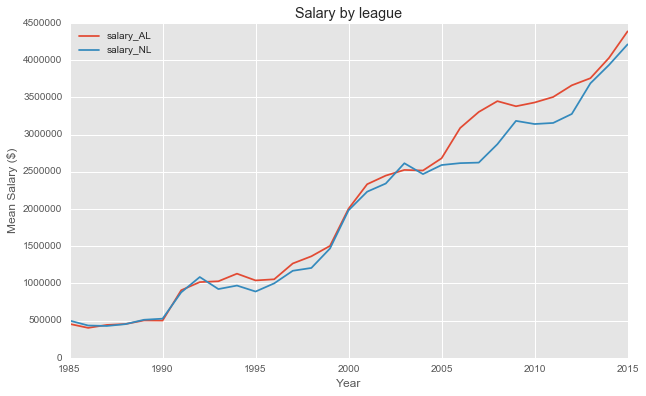

In [12]:
plt.figure()
salaries_by_league[['salary_AL','salary_NL']].plot()
plt.title('Salary by league'); plt.xlabel('Year');plt.ylabel("Mean Salary ($)")

They don't seem that different, so let us plot the difference (AL-NL) over the years.

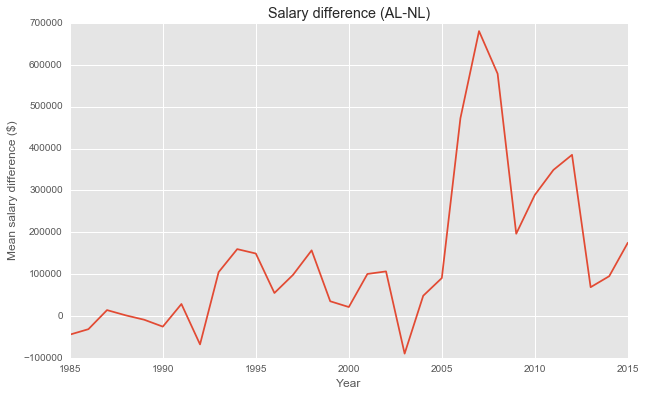

In [13]:
plt.figure()
salaries_by_league['salary_Delta'].plot()
plt.title('Salary difference (AL-NL)'); plt.xlabel('Year'); plt.ylabel("Mean salary difference ($)")

Let us make a t-test to see if they are different or not. Our Null Hypothersis _H0_ is that the mean of the difference is smaller or equal to zero. To perform the t-test, we will use the scipy stat package.

In [14]:
from scipy import stats as st

pval = st.ttest_1samp(salaries_by_league['salary_Delta'],0).pvalue
print "p value of the two-tailed t-test is {}".format(pval)

p value of the two-tailed t-test is 0.000336896600317


In [15]:
print "We reject the null hypothesis and accept the alternative with {}% of \
statistical significance.".format((1-pval/2)*100)

We reject the null hypothesis and accept the alternative with 99.98315517% of statistical significance.


We conclude that the players in the AL league earn, in average, more salary than the players in the NL league.